In [2]:
import numpy as np
from scipy.special import lpmn, factorial
from multipole import Vlm
from multipole import operation as op

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('ggplot')
def plot_3d(x):
    """plot particles in 3 dimentional"""
    y = np.transpose(x)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(y[0], y[1], y[2])
    ax = ax.view_init(30)
    plt.show()
    return 

# Step 1 Multipole Expansion for a single particle-pair

In [4]:
# Case 1 Construction
r1 = [2, 0.3*np.pi, 0.25*np.pi]
r2 = [16.5, 0.3*np.pi, 0.75*np.pi]
r = [r1, r2]
x = op.spherical_to_cartesian(r)

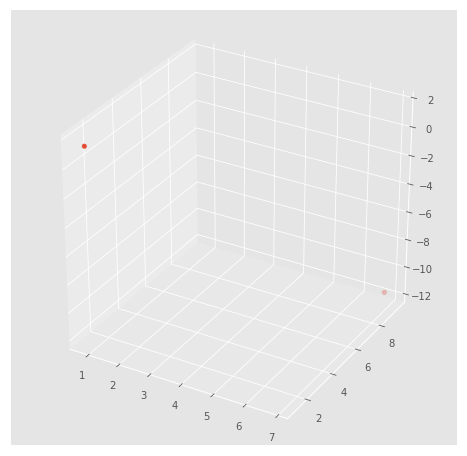

In [5]:
plot_3d(x)

In [7]:
[x0_i, scale_factor] = op.cartesian_scaling_to_unit_range(x)
X0 = op.cartesian_scaling_by_input_factor(np.array([0, 0, 0]), scale_factor)
r0_i = op.cartesian_to_spherical(x0_i-X0)

In [8]:
1 / (op.distance_cal(x0_i[0], x0_i[1]) * scale_factor[1])

0.060165683759618685

In [13]:
p0 = 5

Mlm = op.M_expansion(p0, r0_i[1])
Olm = op.O_expansion(p0, r0_i[0])

potential = Vlm.sum(Mlm.product(Olm))
potential / scale_factor[1]

(0.06281388929277994+0j)

# Step 2 Build Conversion/Translation operators and calculating interaction between two boxes of particle in long distance

In [14]:
# Case 2 Construction
box_size = 1 
X = np.ndarray(shape=(2,3)) #Cartesian coordiantes of box centers
X[0] = [5,3,4]
X[1] = [-20,-4,-3]
num_charge = 10
x_i = np.ndarray(shape=(2*num_charge,3))

for i in range(0, num_charge):
    xi_dev = np.random.rand(3)
    x_i[i] = X[0] + xi_dev - 0.5
    xi_dev = np.random.rand(3)
    x_i[i+num_charge] = X[1] + xi_dev - 0.5

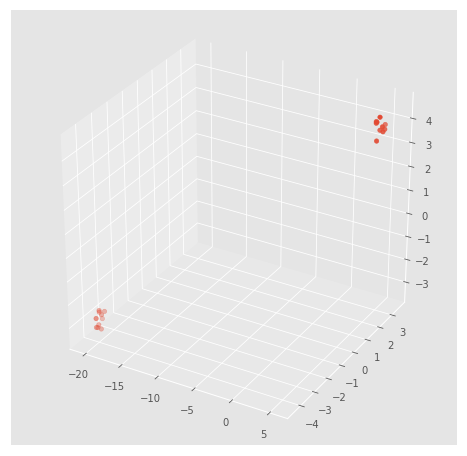

In [15]:
plot_3d(x_i)

In [16]:
[x0_i, scale_factor] = op.cartesian_scaling_to_unit_range(x_i)
X0 = op.cartesian_scaling_by_input_factor(X, scale_factor)

In [18]:
x1_k = x0_i[0:num_charge] - X0[0]
r1_k = op.cartesian_to_spherical(x1_k)
x2_k = x0_i[num_charge:num_charge*2] - X0[1]
r2_k = op.cartesian_to_spherical(x2_k)

analytic_potential = 0 
for i in range(0, num_charge):
    for j in range(0, num_charge):
        analytic_potential += 1 / op.distance_cal(x0_i[i], x0_i[j+num_charge])

analytic_potential / scale_factor[1]

3.721035600489164

In [22]:
# test on conversion operation
p1 = 5

Olm_Q1_x1_k = Vlm(p1) # multiple moment Omegalm(Q1; {x1_k}), Q1 = sum(q_k)
for i in range(0, num_charge):
    Olm_Q1_x1_k.add(op.O_expansion(p1, r1_k[i]))

X12 = op.cartesian_to_spherical([X0[1] - X0[0]])
X21 = op.cartesian_to_spherical([X0[0] - X0[1]])
Mlm_Q1_x2_k = op.O_to_M(Olm_Q1_x1_k, X12[0])

numerical_potential = 0
for j in range(0, num_charge):
    Olm_q2_x2_k = op.O_expansion(p1, r2_k[j])
    numerical_potential += Olm_q2_x2_k.product(Mlm_Q1_x2_k).sum()

numerical_potential / scale_factor[1]

(3.7240874704719293+0j)

In [23]:
Olm_Q2_x2_k = Vlm(p1) # multiple moment Omegalm(Q1; {x1_k}), Q1 = sum(q_k)
for i in range(0, num_charge):
    Olm_Q2_x2_k.add(op.O_expansion(p1, r2_k[i]))

Mlm_Q2_x1_k = op.O_to_M(Olm_Q2_x2_k, X12[0])

numerical_potential_2 = 0
for j in range(0, num_charge):
    Olm_q1_x1_k = op.O_expansion(p1, r1_k[j])
    numerical_potential_2 += Olm_q1_x1_k.product(Mlm_Q2_x1_k).sum()

numerical_potential_2 / scale_factor[1]

(3.71781101911403+6.730154799026005e-20j)

In [24]:
# test on translation operators
X = np.ndarray(shape=(4,3)) #Cartesian coordiantes of box centers
X[0] = [5,3,4]
X[1] = [-20,-4,-3]
X[2] = [5, 4, 5]
X[3] = [-20, -5, -5]
X0 = op.cartesian_scaling_by_input_factor(X, scale_factor)

In [30]:
p1 = 5

Olm_Q1_x1_k = Vlm(p1) # multiple moment Omegalm(Q1; {x1_k}), Q1 = sum(q_k)
for i in range(0, num_charge):
    Olm_Q1_x1_k.add(op.O_expansion(p1, r1_k[i]))
X31 = op.cartesian_to_spherical([X0[0] - X0[2]])

Olm_Q1_x3_k = op.O_to_O(Olm_Q1_x1_k, X31[0])
    
X32 = op.cartesian_to_spherical([X0[1] - X0[2]])
Mlm_Q1_x2_k = op.O_to_M(Olm_Q1_x3_k, X32[0])

numerical_potential = 0
for j in range(0, num_charge):
    Olm_q2_x2_k = op.O_expansion(p1, r2_k[j])
    numerical_potential += Olm_q2_x2_k.product(Mlm_Q1_x2_k).sum()

numerical_potential /  scale_factor[1]

(3.6492858080490715+2.19781617655693e-19j)

In [31]:
p1 = 5

Olm_Q1_x1_k = Vlm(p1) # multiple moment Omegalm(Q1; {x1_k}), Q1 = sum(q_k)
for i in range(0, num_charge):
    Olm_Q1_x1_k.add(op.O_expansion(p1, r1_k[i]))
    
X12 = op.cartesian_to_spherical([X0[1] - X0[0]])
X21 = op.cartesian_to_spherical([X0[0] - X0[1]])
Mlm_Q1_x2_k = op.O_to_M(Olm_Q1_x1_k, X12[0])

X24 = op.cartesian_to_spherical([X0[3] - X0[1]])
Mlm_Q1_x4_k = op.M_to_M(Mlm_Q1_x2_k, X24[0])

x4_k = x0_i[num_charge:num_charge*2] - X0[3]
r4_k = op.cartesian_to_spherical(x4_k)

numerical_potential = 0
for j in range(0, num_charge):
    Olm_q2_x4_k = op.O_expansion(p1, r4_k[j])
    numerical_potential += Olm_q2_x4_k.product(Mlm_Q1_x4_k).sum()

numerical_potential /  scale_factor[1]

(3.7725220090888234+0j)

# Step 3 Calculating interaction of randomly generated particles in 3D space

In [32]:
#case 3 construction
num_particles = 200
x_i = np.ndarray(shape=(3, num_particles))
x_i[0] = 20 * np.random.rand(num_particles) - 10
x_i[1] = 20 * np.random.rand(num_particles) - 10
x_i[2] = 20 * np.random.rand(num_particles) - 10
x_i = np.transpose(x_i)
q = np.ones(num_particles)

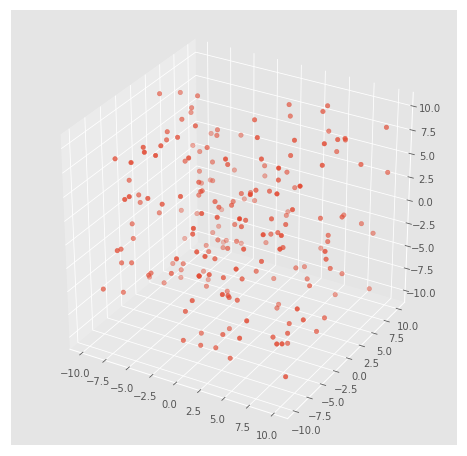

In [33]:
plot_3d(x_i)

In [36]:
[x0_i, scale_factor] = op.cartesian_scaling_to_unit_range(x_i)

In [37]:
# analytical answer
pair_potential = np.zeros(shape=(num_particles,num_particles)) 
for i in range(0, num_particles):
    for j in range(i+1, num_particles):
        pair_potential[i][j] = 1 / (op.distance_cal(x0_i[i], x0_i[j]) * scale_factor[1])

In [38]:
J_analytic = np.zeros(num_particles)
for i in range(0, num_particles):
    J_i = 0
    for j in range(0,i):
        J_i += pair_potential[j][i]
    for j in range(i+1, num_particles):
        J_i += pair_potential[i][j]
    J_analytic[i] = J_i

J_analytic

array([15.19555211, 20.13629857, 20.97706419, 16.06412587, 15.6984997 ,
       17.82776772, 21.75497688, 16.22233602, 17.93232723, 16.38480901,
       23.22951224, 21.9880169 , 18.30147522, 19.04086001, 19.92273003,
       15.89639315, 13.32176143, 16.003714  , 24.82744534, 19.51306576,
       16.57916819, 16.46041673, 19.21345905, 15.54081602, 18.19803884,
       18.70229364, 16.56817813, 18.64102418, 16.96903885, 16.09072965,
       15.11640582, 19.15278696, 16.38983139, 17.06789947, 15.67956297,
       16.7090886 , 17.76801981, 21.60110371, 21.65827352, 12.5160697 ,
       18.43251918, 23.99532337, 23.08345605, 24.51581711, 14.77630444,
       17.64391162, 17.40549499, 19.15831369, 17.71826761, 16.01276946,
       18.53920682, 23.2819799 , 12.53681027, 23.04545985, 17.52962476,
       18.53876144, 17.23881341, 21.54289037, 16.03451244, 17.54051798,
       19.05517126, 20.25120716, 17.96944196, 15.10810197, 17.73550058,
       23.25068659, 22.99199495, 15.57825641, 18.41617366, 16.77

In [39]:
total_energy = 0.5 * sum(J_analytic)
total_energy

1863.6775538099785

In [67]:
x12 = op.cartesian_to_spherical([x0_i[0]])[0]

In [74]:
op.O_expansion(3, x12).Vn

array([[ 0.07012483+0.48089265j,  0.        +0.        j,
         0.        +0.        j],
       [ 0.04784189+0.32808373j, -0.11317012+0.03372251j,
         0.        +0.        j],
       [ 0.00803893+0.05512829j, -0.07720907+0.02300681j,
        -0.00805098-0.01735263j]])

In [70]:
Ox = op.O_expansion(3, [0,0,0])

In [72]:
Oy = op.O_to_O(Ox, x12, 3)

In [75]:
Oy.Vn

array([[ 0.07012483+0.48089265j,  0.        +0.        j,
         0.        +0.        j],
       [ 0.04784189+0.32808373j, -0.11317012+0.03372251j,
         0.        +0.        j],
       [ 0.00803893+0.05512829j, -0.07720907+0.02300681j,
        -0.00805098-0.01735263j]])

In [13]:
bin(8)

'0b1000'

In [16]:
int('0b1010', 2)

10

In [17]:
len(bin(8))

6